Data Information

This research employed a binary variable, default payment (Yes = 1, No = 0), as the
response variable. This study reviewed the literature and used the following 23 variables
as explanatory variables:

X1: Amount of the given credit (NT dollar): it includes both the individual consumer
credit and his/her family (supplementary) credit.

X2: Gender (1 = male; 2 = female).

X3: Education (1 = graduate school; 2 = university; 3 = high school; 0, 4, 5, 6 = others).

X4: Marital status (1 = married; 2 = single; 3 = divorce; 0=others).

X5: Age (year).

Payment history
X6: September05 - PAY_0
X7: August05 - PAY_2
X8: July05 - PAY_3
X9: June05 - PAY_4
X10: May05 - PAY_5
X11: April05 - PAY_6

The measurement scale for the repayment status is:
-2: No consumption
-1: Paid in full 
 0: The use of revolving credit
 1 = payment delay for one month
 2 = payment delay for two months
 3 = payment delay for three months
 4 = payment delay for four months
 5 = payment delay for five months
 6 = payment delay for six months
 7 = payment delay for seven months
 8 = payment delay for eight months
 9 = payment delay for nine months and above.

Billing statements for that month
X12: September05 - BILL_AMT1
X13: August05 - BILL_AMT2
X14: July05 - BILL_AMT3
X15: June05 - BILL_AMT4
X16: May05 - BILL_AMT5
X17: April05 - BILL_AMT6

Amount of previous payment
X12: September05 - PAY_AMT1
X13: August05 - PAY_AMT2
X14: July05 - PAY_AMT3
X15: June05 - PAY_AMT4
X16: May05 - PAY_AMT5
X17: April05 - PAY_AMT6

Y: client's behavior; Y=0 then not default, Y=1 then default"


Import Library

In [120]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from IPython.display import Image
%matplotlib inline


In [44]:
plt.rcParams['figure.figsize'] = (10.0, 8.0)

In [45]:
os.chdir('F:/UT Data Analytics/Course 5 - Data Science with Python/Task 2 - Prepare and Explore the Data')

In [46]:
credit = pd.read_csv('CreditOne_default.csv', header =1)

In [47]:
sns.set()

Read Dataset Using Pandas

In [48]:
credit.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0


Summary of Dataset

In [49]:
credit.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


Examine Variable Data Types

In [50]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

Check for Missing Data

In [51]:
credit.isnull().any()

ID                            False
LIMIT_BAL                     False
SEX                           False
EDUCATION                     False
MARRIAGE                      False
AGE                           False
PAY_0                         False
PAY_2                         False
PAY_3                         False
PAY_4                         False
PAY_5                         False
PAY_6                         False
BILL_AMT1                     False
BILL_AMT2                     False
BILL_AMT3                     False
BILL_AMT4                     False
BILL_AMT5                     False
BILL_AMT6                     False
PAY_AMT1                      False
PAY_AMT2                      False
PAY_AMT3                      False
PAY_AMT4                      False
PAY_AMT5                      False
PAY_AMT6                      False
default payment next month    False
dtype: bool

In [52]:
credit = credit.rename(columns = {'default payment next month':'default'})

In [53]:
credit = credit.dropna()

In [54]:
#Remove 'ID' because it doesn't provide an value added information.
credit = credit.drop(['ID'], axis = 1)

In [55]:
credit.head(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,500000,1,1,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,100000,2,2,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,140000,2,3,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,20000,1,3,2,35,-2,-2,-2,-2,-1,...,0,13007,13912,0,0,0,13007,1122,0,0


In [56]:
header = credit.dtypes.index

In [57]:
header

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')

Visual Analysis

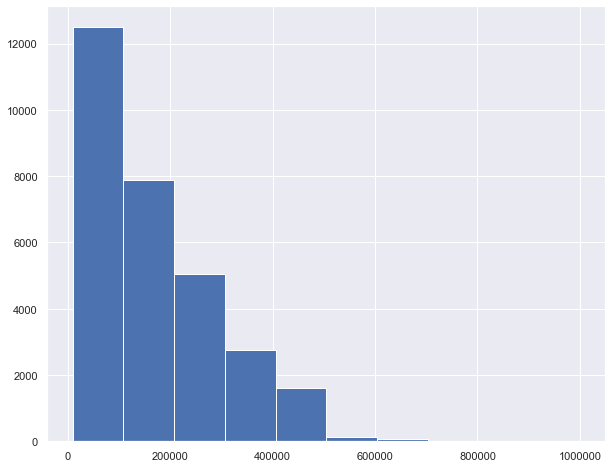

In [58]:
#Histogram chart showing the count of limit balances for each borrower.  The limit balances are divided into 7 bins.
plt.hist(credit['LIMIT_BAL'])
plt.show()


In [136]:
px_fig = px.histogram(credit, x = "LIMIT_BAL")
#px_fig.show()

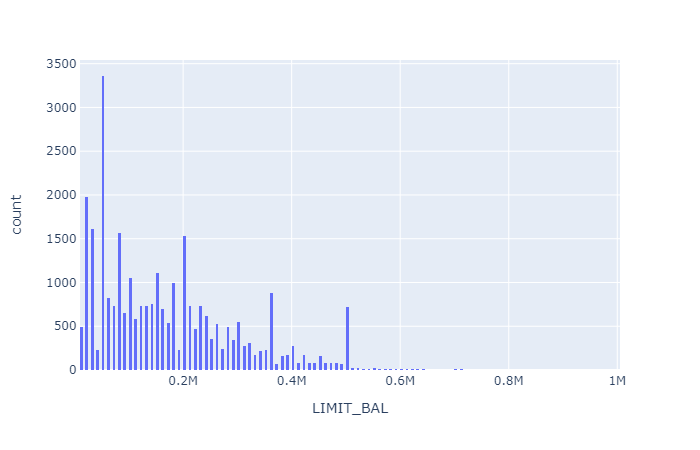

In [125]:
px_fig.show('png')

Majority of balances are around 50k.
As the balance increases, the count decreases.

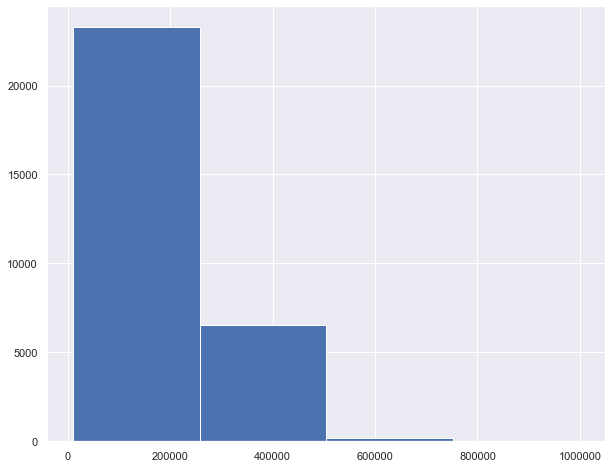

In [61]:
#Same histogram chart as above except the bin count is 4.
plt.hist(credit['LIMIT_BAL'], bins = 4)
plt.show()

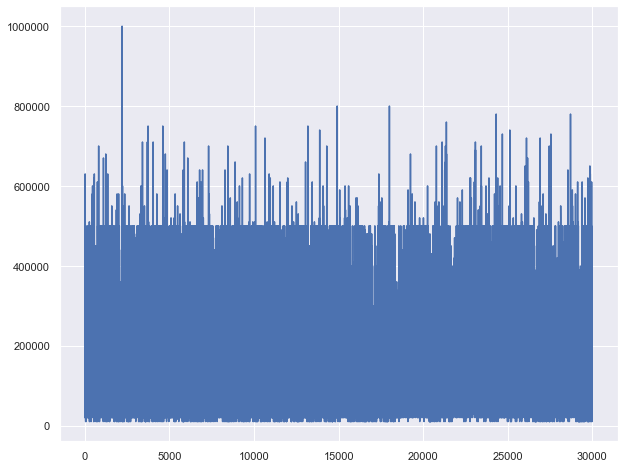

In [62]:
#Line plot of all limit balance observations.
plt.plot(credit['LIMIT_BAL'])
plt.show()

This line plot is shows us the large balance observations but is too crowded to tell us anything below the 500k mark.

In [63]:
x = credit['PAY_0']
y = credit['PAY_2']

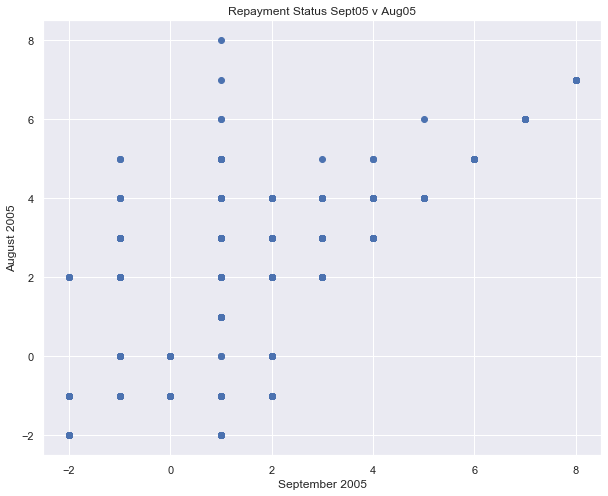

In [64]:
#This scatter plot compares the replayment status of September and August of 2005 (September 05 = x-axis, August 05 = y-axis)

plt.scatter(x,y)
plt.title("Repayment Status Sept05 v Aug05")
plt.xlabel("September 2005")
plt.ylabel("August 2005")
plt.show()

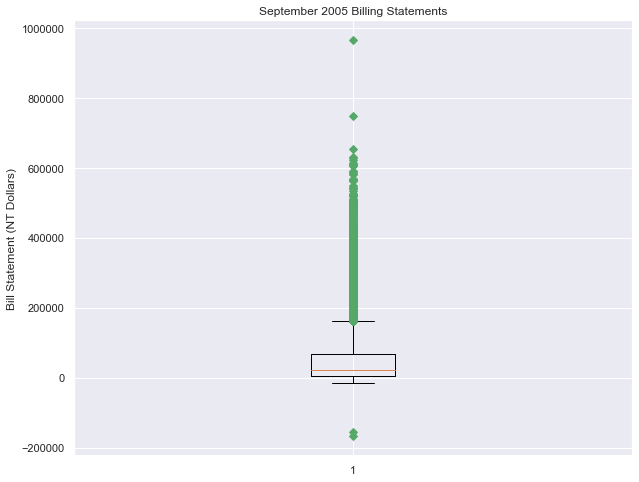

In [65]:
#Summary data of "BILL_AMT1" in a box plot.
A = credit['BILL_AMT1']
plt.boxplot(A,0,'gD')
plt.title("September 2005 Billing Statements")
plt.ylabel("Bill Statement (NT Dollars)")
plt.show()

In [135]:
box_fig = px.box(credit, y = 'LIMIT_BAL')
#box_fig.show()

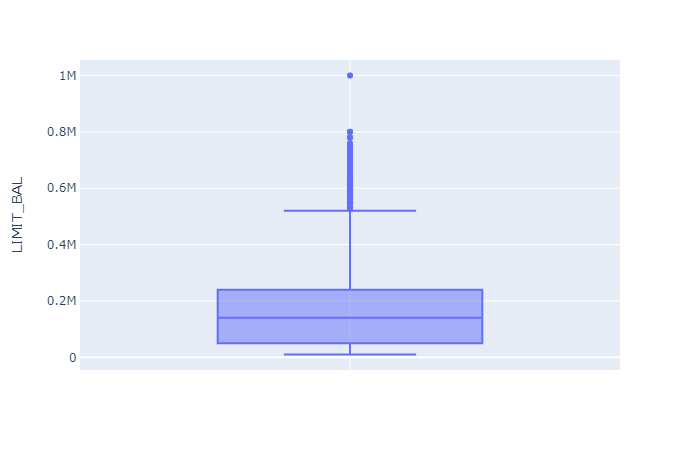

In [126]:
box_fig.show('png')

In [67]:
#Create covariance matrix of the data.
covMat = credit.cov()
print(covMat)

              LIMIT_BAL          SEX     EDUCATION     MARRIAGE  \
LIMIT_BAL  1.683446e+10  1571.050630 -22474.028945 -7323.669658   
SEX        1.571051e+03     0.239247      0.005502    -0.008014   
EDUCATION -2.247403e+04     0.005502      0.624651    -0.059184   
MARRIAGE  -7.323670e+03    -0.008014     -0.059184     0.272452   
AGE        1.730767e+05    -0.409726      1.275380    -1.992764   
PAY_0     -3.954593e+04    -0.031685      0.093584     0.011683   
PAY_2     -4.603765e+04    -0.041442      0.115025     0.015122   
PAY_3     -4.443225e+04    -0.038694      0.107861     0.020421   
PAY_4     -4.057181e+04    -0.034411      0.100528     0.020213   
PAY_5     -3.667056e+04    -0.030521      0.087340     0.021074   
PAY_6     -3.509308e+04    -0.024754      0.074816     0.020616   
BILL_AMT1  2.727020e+09 -1211.694332   1372.377644  -902.154685   
BILL_AMT2  2.570130e+09 -1085.595467   1054.657595  -802.517866   
BILL_AMT3  2.548533e+09  -833.207432    712.664124  -901.67908

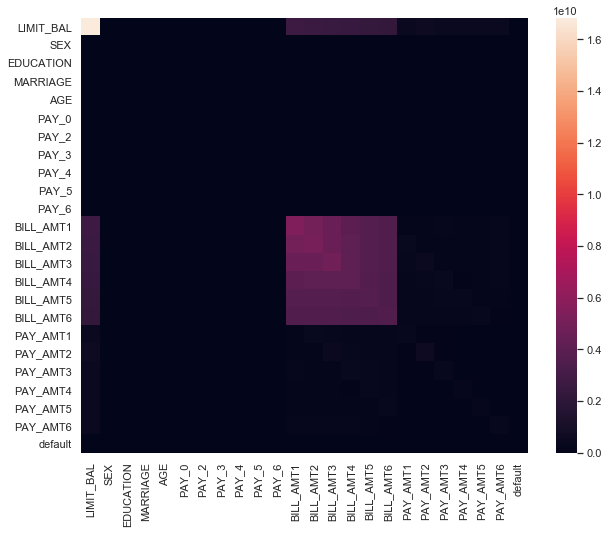

In [68]:
sns.heatmap(credit.cov())

In [69]:
#Create correlation matrix of the data.
corrMat = credit.corr()
print(corrMat)


           LIMIT_BAL       SEX  EDUCATION  MARRIAGE       AGE     PAY_0  \
LIMIT_BAL   1.000000  0.024755  -0.219161 -0.108139  0.144713 -0.271214   
SEX         0.024755  1.000000   0.014232 -0.031389 -0.090874 -0.057643   
EDUCATION  -0.219161  0.014232   1.000000 -0.143464  0.175061  0.105364   
MARRIAGE   -0.108139 -0.031389  -0.143464  1.000000 -0.414170  0.019917   
AGE         0.144713 -0.090874   0.175061 -0.414170  1.000000 -0.039447   
PAY_0      -0.271214 -0.057643   0.105364  0.019917 -0.039447  1.000000   
PAY_2      -0.296382 -0.070771   0.121566  0.024199 -0.050148  0.672164   
PAY_3      -0.286123 -0.066096   0.114025  0.032688 -0.053048  0.574245   
PAY_4      -0.267460 -0.060173   0.108793  0.033122 -0.049722  0.538841   
PAY_5      -0.249411 -0.055064   0.097520  0.035629 -0.053826  0.509426   
PAY_6      -0.235195 -0.044008   0.082316  0.034345 -0.048773  0.474553   
BILL_AMT1   0.285430 -0.033642   0.023581 -0.023472  0.056239  0.187068   
BILL_AMT2   0.278314 -0.0

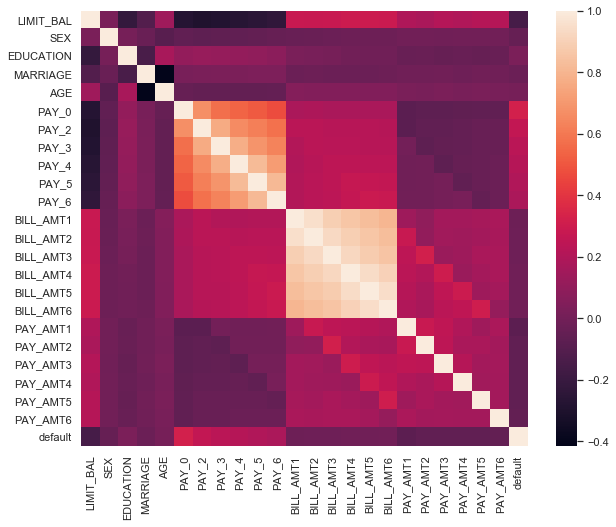

In [70]:
sns.heatmap(credit.corr())

The correlation heatmap gives us a quick visual of correlated features in the dataset.
The limit balance has a strong correlation with the billing statements.
Loan defaults seem to have a stronger correlation with payment history, especially the Sept05 payment history.

In [71]:
credit.groupby('SEX')['SEX'].count()

SEX
1    11888
2    18112
Name: SEX, dtype: int64

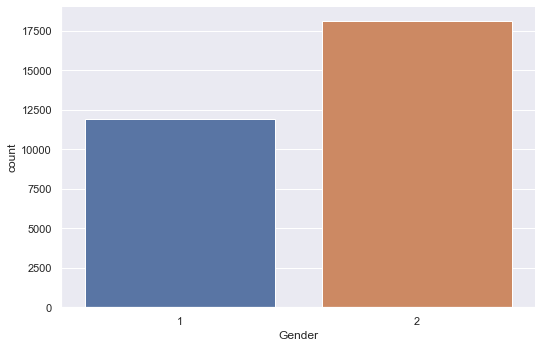

In [72]:
fg_sx = sns.catplot('SEX', data = credit, kind = 'count', aspect = 1.5)
fg_sx.set_xlabels('Gender')

In [73]:
credit.groupby('default')['default'].count()

default
0    23364
1     6636
Name: default, dtype: int64

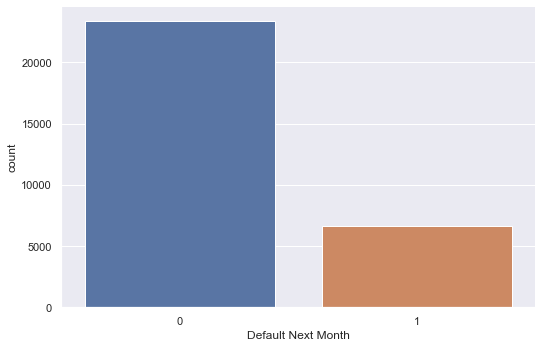

In [74]:
fg_sx = sns.catplot('default', data = credit, kind = 'count', aspect = 1.5)
fg_sx.set_xlabels('Default Next Month')

In [75]:
#Count borrows by education
credit.groupby('EDUCATION')['EDUCATION'].count()

EDUCATION
0       14
1    10585
2    14030
3     4917
4      123
5      280
6       51
Name: EDUCATION, dtype: int64

A larger number of borrowers went to college (university or graduate school) than those who didn't.
One could make the assumption that many of these loans are student loans.

In [76]:
#Combine all "Other" education levels to 0.  There is no need to have multiple integers represent the same thing.
credit['EDUCATION'] = np.where((credit.EDUCATION == 4), 0, credit.EDUCATION)
credit['EDUCATION'] = np.where((credit.EDUCATION == 5), 0, credit.EDUCATION)
credit['EDUCATION'] = np.where((credit.EDUCATION == 6), 0, credit.EDUCATION)
credit

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


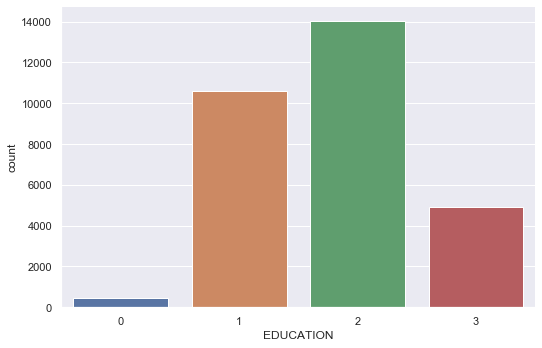

In [77]:
#Bar chart of updated borrower education level.
fg_sx = sns.catplot('EDUCATION', data = credit, kind = 'count', aspect = 1.5)
fg_sx.set_xlabels('EDUCATION')

University and Graduate level borrowers greater exceed those of high school levels or "other".

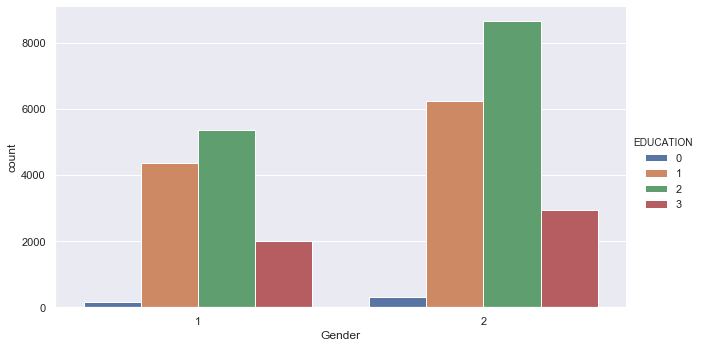

In [78]:
#Side by side bar charts showing education levels for each gender.
sx_edu = sns.catplot('SEX', data=credit, hue='EDUCATION', kind='count', aspect=1.75)
sx_edu.set_xlabels('Gender')

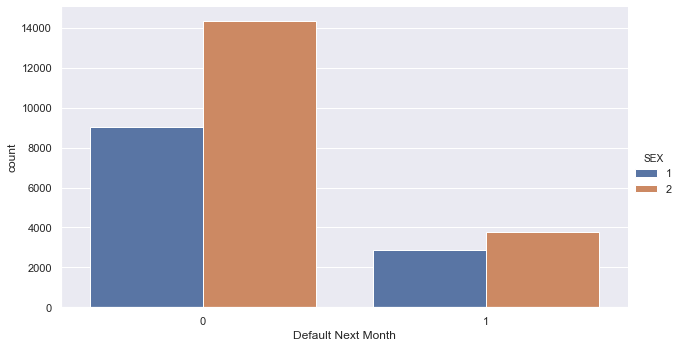

In [79]:
sx_dft = sns.catplot('default', data=credit, hue='SEX', kind='count', aspect=1.75)
sx_dft.set_xlabels('Default Next Month')

This bar chart shows us that males are more likely to default than females.

In [80]:
credit.pivot_table('default', 'SEX', 'EDUCATION', aggfunc=np.sum, margins=True)

EDUCATION,0,1,2,3,All
SEX,,,,,
1,14,906,1408,545,2873
2,19,1130,1922,692,3763
All,33,2036,3330,1237,6636


In [81]:
credit.pivot_table('default', 'SEX', 'MARRIAGE', aggfunc=np.sum, margins=True)

MARRIAGE,0,1,2,3,All
SEX,,,,,
1,2,1346,1485,40,2873
2,3,1860,1856,44,3763
All,5,3206,3341,84,6636


In [82]:
no_dft = credit[credit['default']==0]

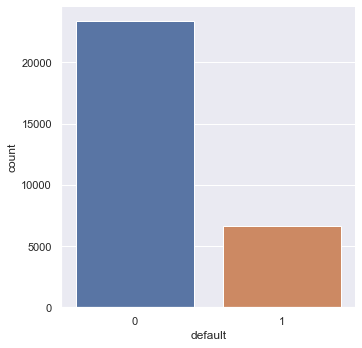

In [83]:
sns.catplot('default', data = credit, kind = 'count')

In [84]:
len(no_dft)

23364

In [85]:
no_dft.pivot_table('default', 'SEX', 'EDUCATION', aggfunc=len, margins=True)

EDUCATION,0,1,2,3,All
SEX,,,,,
1,156,3448,3966,1445,9015
2,279,5101,6734,2235,14349
All,435,8549,10700,3680,23364


In [86]:
no_dft.pivot_table('default', 'EDUCATION', 'MARRIAGE', aggfunc=len, margins=True)

MARRIAGE,0,1,2,3,All
EDUCATION,,,,,
0,NaN,217.0,210.0,8.0,435
1,4.0,2953.0,5555.0,37.0,8549
2,5.0,5176.0,5401.0,118.0,10700
3,40.0,2107.0,1457.0,76.0,3680
All,49.0,10453.0,12623.0,239.0,23364


In [87]:
credit.AGE.describe()

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

In [88]:
age = credit['AGE'].dropna()

Text(0.5, 1.0, 'Distribution of Borrowers Ages')

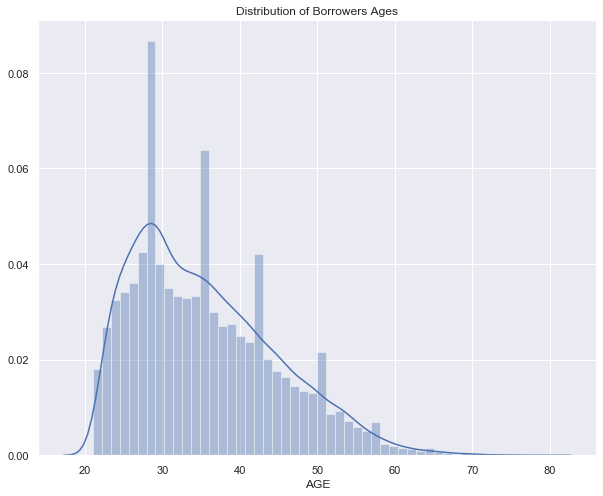

In [89]:
age_dist = sns.distplot(age)
age_dist.set_title("Distribution of Borrowers Ages")

#This distribution chart shows the majority of borrowers are between 25 and 35.

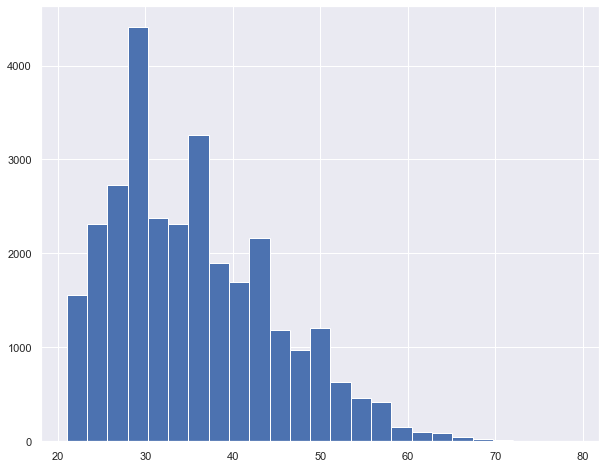

In [90]:
credit['AGE'].hist(bins=25)

[(0, 1000000)]

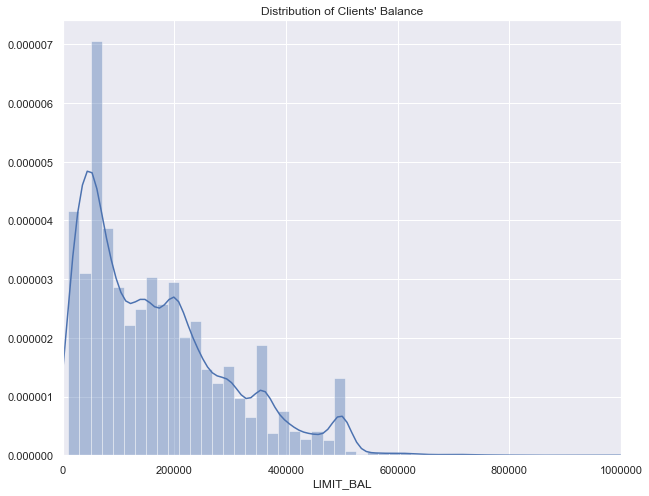

In [91]:
balance = sns.distplot(credit['LIMIT_BAL'])
balance.set_title("Distribution of Clients' Balance")
maxBal = credit['LIMIT_BAL'].max()
balance.set(xlim=(0,maxBal))

#This distribution chart shows the majority of the borrowers balances are between 50k and 60k.

In [92]:
#Function that will group borrower ages into 3 groups
def early_middle_late(borrower):
    age = borrower
    if (age >= 18) & (age <= 40):
        return 'Young Adult'
    elif (age >= 41) & (age <= 60):
        return 'Middle-Aged'
    elif age >= 61:
        return 'Mature Adult'
    else:
        return 'NA'

In [93]:
credit['borrower'] = credit['AGE'].apply(early_middle_late)
credit[:10]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,borrower
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,689,0,0,0,0,1,Young Adult
1,120000,2,2,2,26,-1,2,0,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,Young Adult
2,90000,2,2,2,34,0,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,Young Adult
3,50000,2,2,1,37,0,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,Young Adult
4,50000,1,2,1,57,-1,0,-1,0,0,...,19146,19131,2000,36681,10000,9000,689,679,0,Middle-Aged
5,50000,1,1,2,37,0,0,0,0,0,...,19619,20024,2500,1815,657,1000,1000,800,0,Young Adult
6,500000,1,1,2,29,0,0,0,0,0,...,483003,473944,55000,40000,38000,20239,13750,13770,0,Young Adult
7,100000,2,2,2,23,0,-1,-1,0,0,...,-159,567,380,601,0,581,1687,1542,0,Young Adult
8,140000,2,3,1,28,0,0,2,0,0,...,11793,3719,3329,0,432,1000,1000,1000,0,Young Adult
9,20000,1,3,2,35,-2,-2,-2,-2,-1,...,13007,13912,0,0,0,13007,1122,0,0,Young Adult


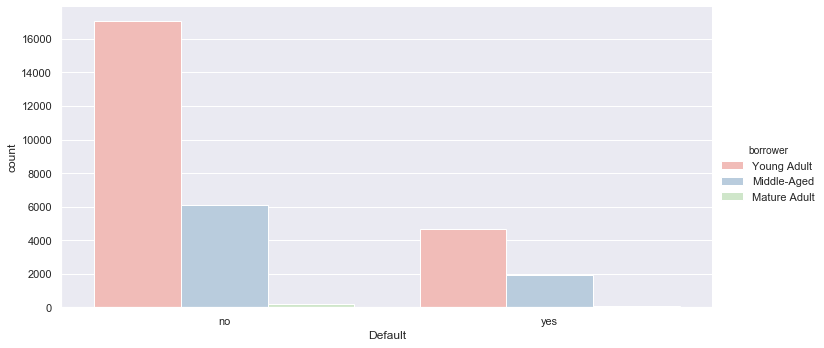

In [94]:

credit['Default'] = credit.default.map({0:'no', 1:'yes'})
sns.catplot('Default', data=credit, kind='count', hue='borrower', palette = 'Pastel1', order = ['no','yes'],
               hue_order=['Young Adult','Middle-Aged','Mature Adult'], aspect=2)

#We can see in the chart below that a Middle-Aged borrower is more likely to default than a young adult.

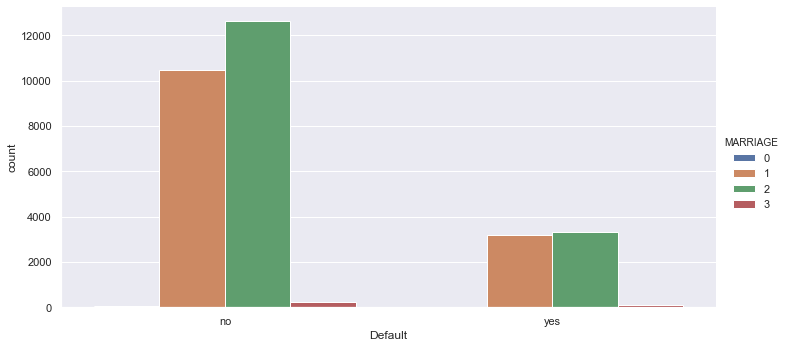

In [95]:
sns.catplot('Default', data=credit, kind='count', hue='MARRIAGE', order = ['no','yes'],
               aspect=2)

#We can see in the bar graph below there are more single borrowers than any other marital status.

In [96]:
#Count number of age groups
credit['borrower'].value_counts()

Young Adult     21726
Middle-Aged      8002
Mature Adult      272
Name: borrower, dtype: int64

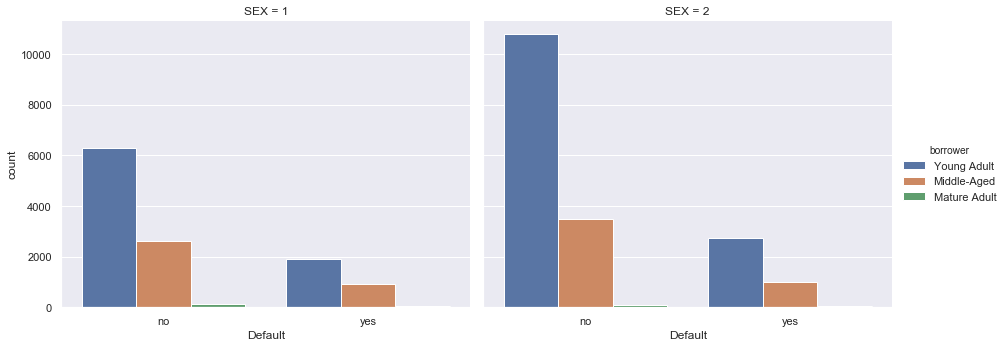

In [97]:
# Do the same as above, but split the borrows by gender

sns.catplot('Default', data=credit, kind='count', hue='borrower', col='SEX', order=['no','yes'], 
               hue_order=['Young Adult','Middle-Aged','Mature Adult'], aspect=1.25, height=5)

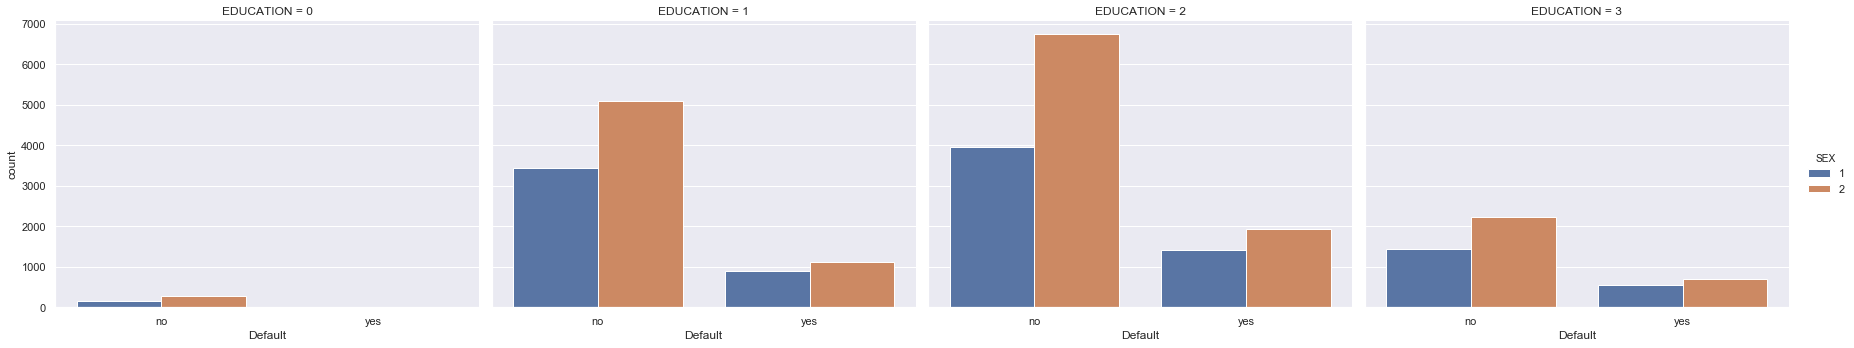

In [98]:
# Do the same as above, but split the borrows by gender
sns.catplot('Default', data=credit, kind='count', hue='SEX', col='EDUCATION', order=['no','yes'], 
               hue_order=[1,2], aspect=1.25, height=5)

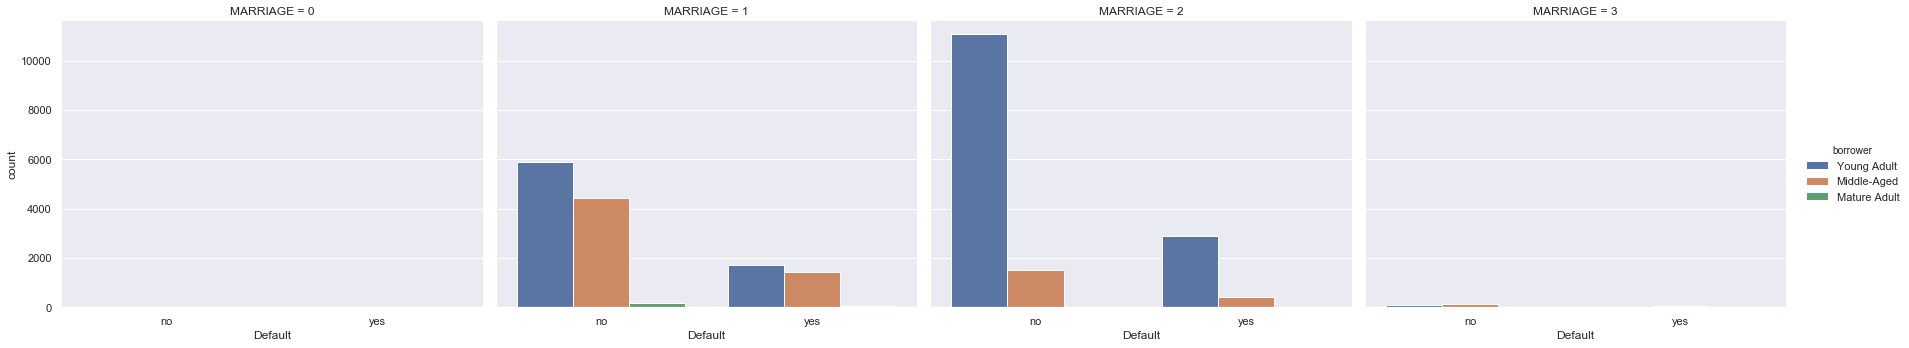

In [99]:
# Do the same as above, but split the borrows by gender
sns.catplot('Default', data=credit, kind='count', hue='borrower', col='MARRIAGE', order=['no','yes'], 
               hue_order=['Young Adult','Middle-Aged','Mature Adult'], aspect=1.25, height=5)

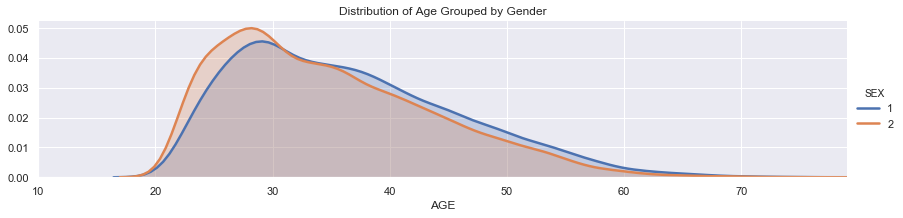

In [100]:
sns.set_context(rc={"lines.linewidth": 2.5})
fig = sns.FacetGrid(credit, hue='SEX', aspect=4)
fig.map(sns.kdeplot, 'AGE', shade=True)
oldest = credit['AGE'].max()
fig.set(xlim=(10,oldest))
fig.set(title='Distribution of Age Grouped by Gender')
fig.add_legend()

#The distribution of age chart shows us primary borrowers (male and female) are in their mid 20's to mid 30's.

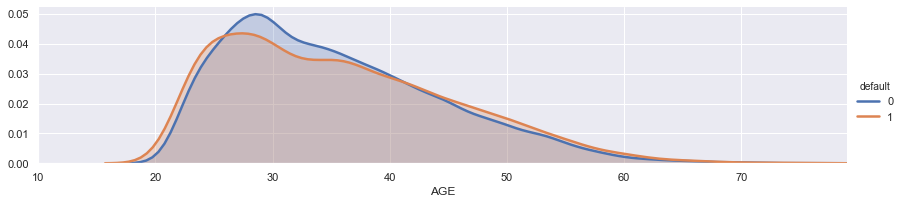

In [101]:

fig = sns.FacetGrid(credit, hue='default', aspect=4)
fig.map(sns.kdeplot, 'AGE', shade=True)
oldest = credit['AGE'].max()
fig.set(xlim=(10,oldest))
fig.add_legend()

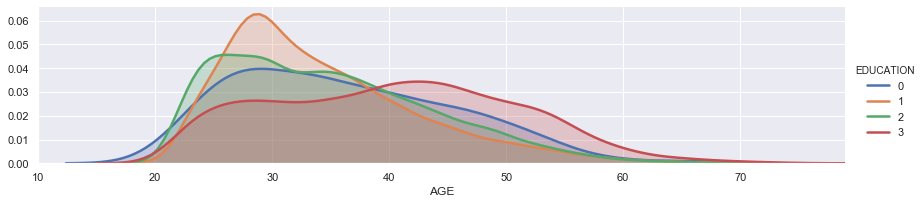

In [102]:
fig = sns.FacetGrid(credit, hue='EDUCATION', aspect=4)
fig.map(sns.kdeplot, 'AGE', shade=True)
oldest = credit['AGE'].max()
fig.set(xlim=(10,oldest))
fig.add_legend()

#The following distribution chart shows more high school level borrowers at greater ages.

In [103]:
credit.rename(columns={"PAY_0": "Sept05","PAY_2": "Aug05","PAY_3": "July05","PAY_4": "June05","PAY_5": "May05","PAY_6": "Apr05"}, inplace = True)
credit.info()
credit.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 29999
Data columns (total 26 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   LIMIT_BAL  30000 non-null  int64 
 1   SEX        30000 non-null  int64 
 2   EDUCATION  30000 non-null  int64 
 3   MARRIAGE   30000 non-null  int64 
 4   AGE        30000 non-null  int64 
 5   Sept05     30000 non-null  int64 
 6   Aug05      30000 non-null  int64 
 7   July05     30000 non-null  int64 
 8   June05     30000 non-null  int64 
 9   May05      30000 non-null  int64 
 10  Apr05      30000 non-null  int64 
 11  BILL_AMT1  30000 non-null  int64 
 12  BILL_AMT2  30000 non-null  int64 
 13  BILL_AMT3  30000 non-null  int64 
 14  BILL_AMT4  30000 non-null  int64 
 15  BILL_AMT5  30000 non-null  int64 
 16  BILL_AMT6  30000 non-null  int64 
 17  PAY_AMT1   30000 non-null  int64 
 18  PAY_AMT2   30000 non-null  int64 
 19  PAY_AMT3   30000 non-null  int64 
 20  PAY_AMT4   30000 non-null  i

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,Sept05,Aug05,July05,June05,May05,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,borrower,Default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,689,0,0,0,0,1,Young Adult,yes
1,120000,2,2,2,26,-1,2,0,0,0,...,3261,0,1000,1000,1000,0,2000,1,Young Adult,yes
2,90000,2,2,2,34,0,0,0,0,0,...,15549,1518,1500,1000,1000,1000,5000,0,Young Adult,no
3,50000,2,2,1,37,0,0,0,0,0,...,29547,2000,2019,1200,1100,1069,1000,0,Young Adult,no
4,50000,1,2,1,57,-1,0,-1,0,0,...,19131,2000,36681,10000,9000,689,679,0,Middle-Aged,no


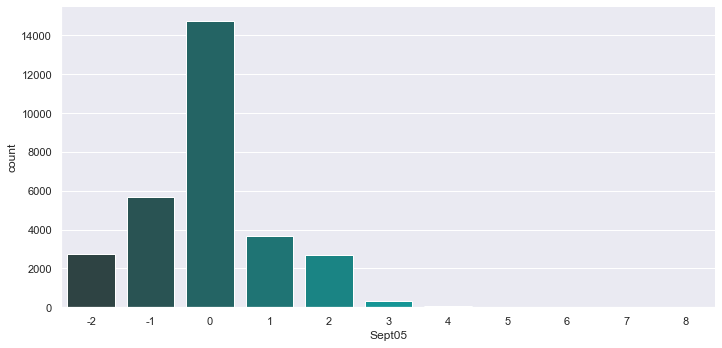

In [104]:
sns.catplot('Sept05',data=credit, kind='count',  aspect=2, palette='winter_d')


In [105]:
credit.groupby('Sept05')['Sept05'].count()

Sept05
-2     2759
-1     5686
 0    14737
 1     3688
 2     2667
 3      322
 4       76
 5       26
 6       11
 7        9
 8       19
Name: Sept05, dtype: int64

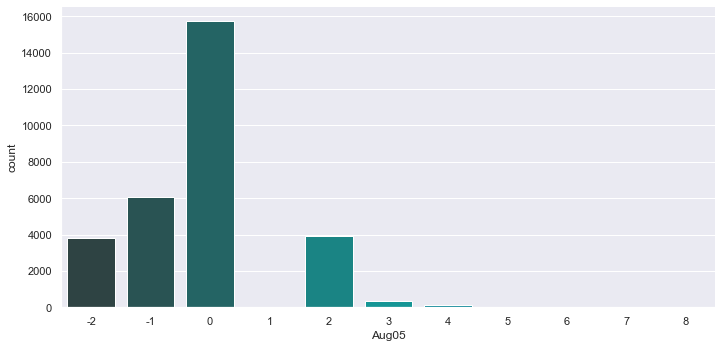

In [106]:
sns.catplot('Aug05',data=credit, kind='count',  aspect=2, palette='winter_d')

In [107]:
credit.groupby('Aug05')['Aug05'].count()

Aug05
-2     3782
-1     6050
 0    15730
 1       28
 2     3927
 3      326
 4       99
 5       25
 6       12
 7       20
 8        1
Name: Aug05, dtype: int64

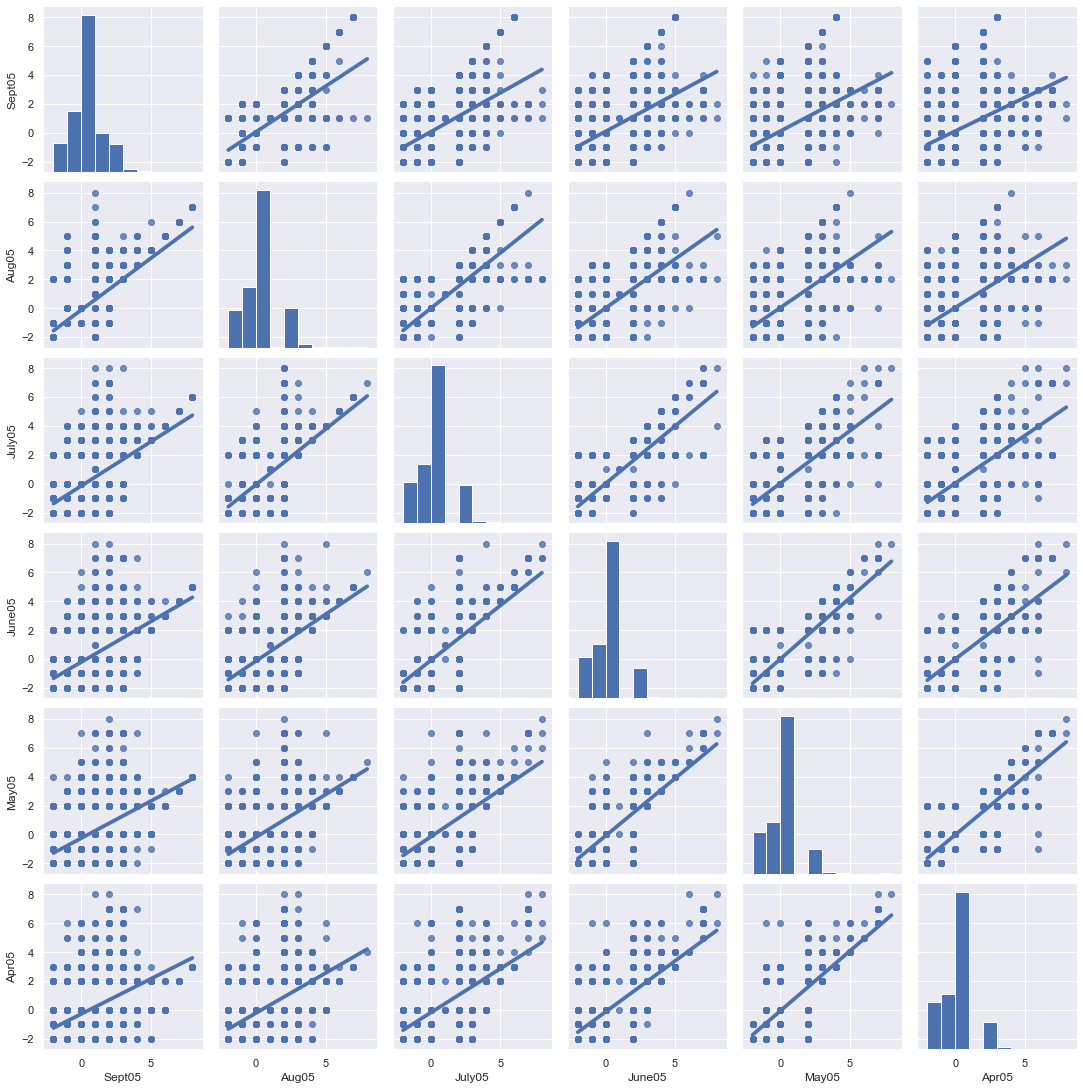

In [108]:
credit_pay = credit.loc[:,'Sept05':'Apr05']
sns.pairplot(credit_pay, kind="reg")
plt.show()

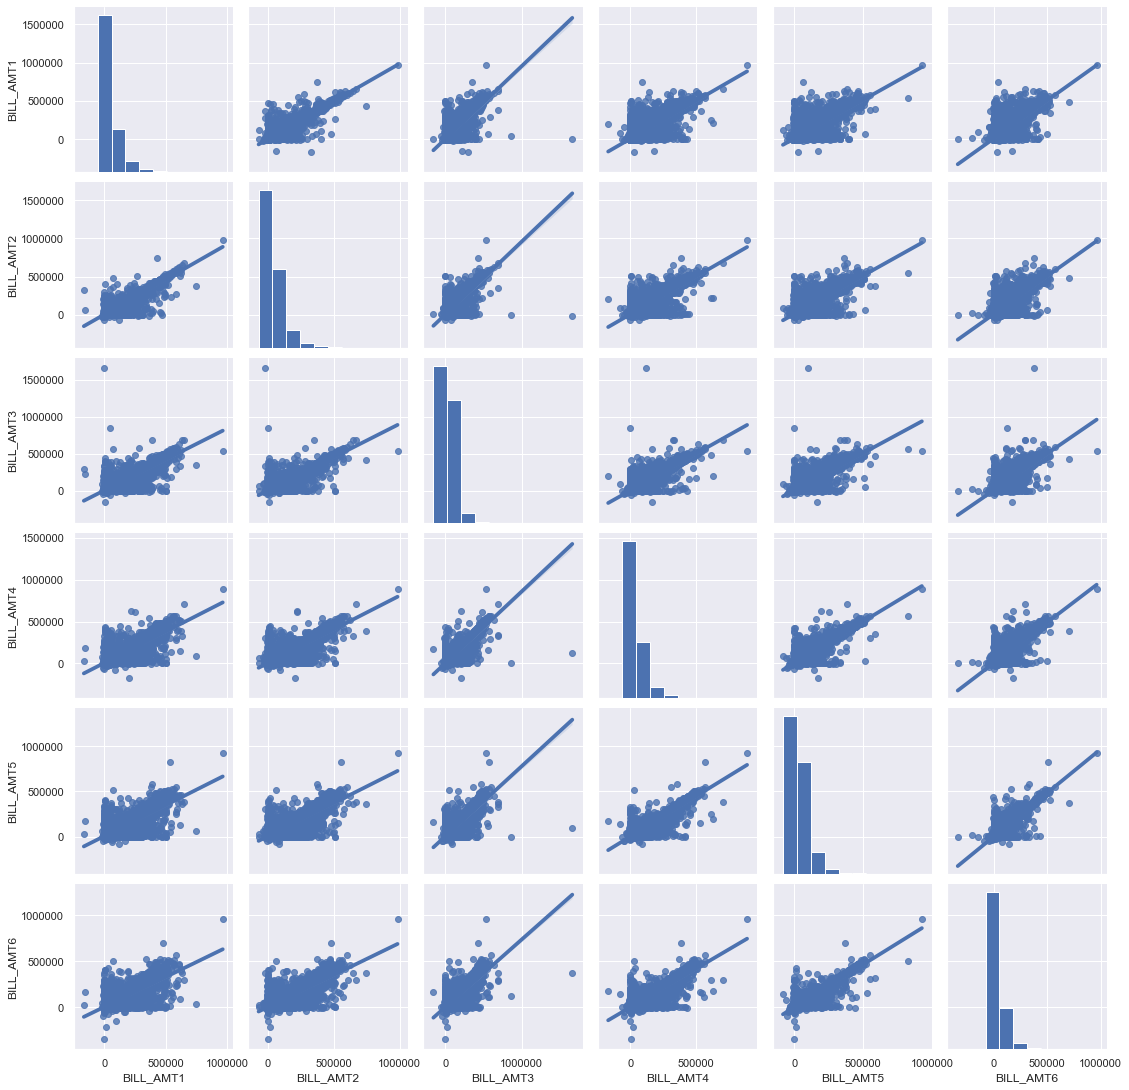

In [109]:
credit_billAmt = credit.loc[:,'BILL_AMT1':'BILL_AMT6']
sns.pairplot(credit_billAmt, kind="reg")
plt.show()

In [132]:
plt_fig = px.scatter(credit.sample(5000), x = 'AGE', y = 'LIMIT_BAL',
                    size = 'PAY_AMT1', color = 'default')
#plt_fig.show()

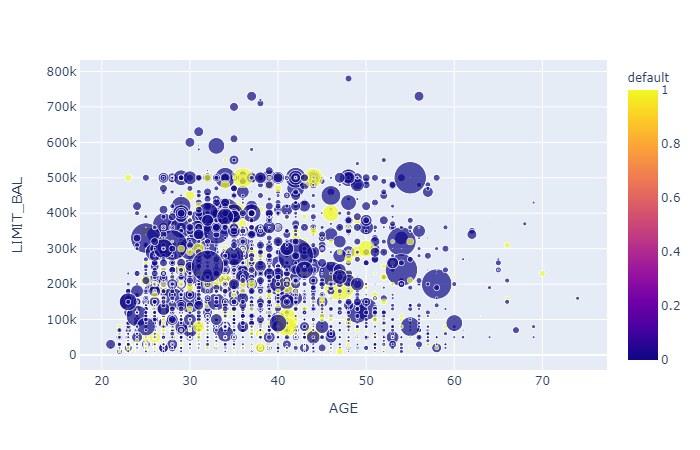

In [129]:
plt_fig.show('png')

In [111]:
###Create payment amount sum column and include in similar chart above
pay_sum = credit[['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']]
pay_sum

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,0,689,0,0,0,0
1,0,1000,1000,1000,0,2000
2,1518,1500,1000,1000,1000,5000
3,2000,2019,1200,1100,1069,1000
4,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...
29995,8500,20000,5003,3047,5000,1000
29996,1837,3526,8998,129,0,0
29997,0,0,22000,4200,2000,3100
29998,85900,3409,1178,1926,52964,1804


In [112]:
#Creating sum of all payments
pay_sum = pay_sum.sum(axis=1)


In [113]:
#Adding payments sums to new column "Total Payments"
credit['Total Payments'] = pay_sum
credit['Total Payments'].head()

0      689
1     5000
2    11018
3     8388
4    59049
Name: Total Payments, dtype: int64

In [133]:
#Sample of 5000 observations
#Bubble size indicates the total amount
plt2_fig = px.scatter(credit.sample(5000), x = 'AGE', y = 'LIMIT_BAL',
                    size = 'Total Payments', color = 'Default')
#plt2_fig.show()

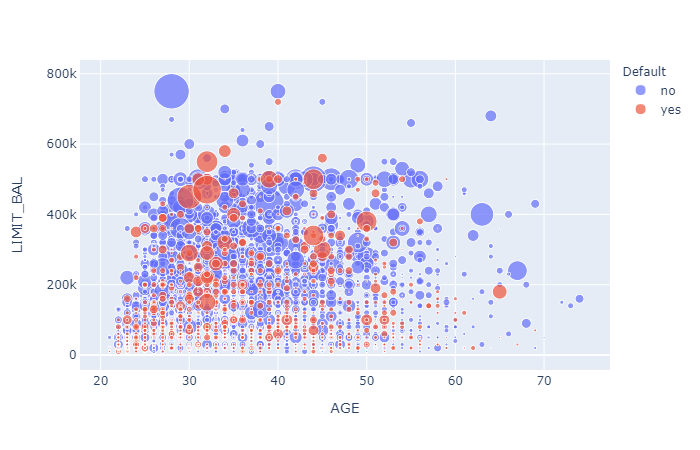

In [130]:
plt2_fig.show('png')

 EDA Observations

- Of the 30k observations, 39.6% of the borrowers were male and 60.4% female
- Defaulted payments next month: 77.9% No, 22.1% Yes
- Total credit received "Mode": 50k
- Total credit received summary: Min - 10k, Q1 - 50k, Med - 140k, Q3 - 240k, Max - 1M
- Education Levels: 35.3% Graduate, 46.7% University, 16.4% High School, 1.6% Other
- Found a strong positive correlation between all monthly billing statements
- Found a strong positive correlation between all monthly replayment status
- The percent default for males was greater than the percent default for females
- For the observed defaulted payments next month, 43.3% were male, 57.7% were female
- For the observed defaulted payments next month, 30.7% graduate level, 50.2% university, 18.6% high school, 0.5% other
- For the observed defaulted payments next month, 48.3% married, 50.4% single, 1.3% divorced, almost 0% other (5 total)
- Single borrowers appear to be slightly more likely to default next month than married borrowers
- Borrower Age Summary: Mean - 35.5, Min - 21, Q1 - 28, Med - 34, Q3 - 41, Max - 79
- Middle-aged borrowers are slightly more likely to default next month than young adults
- Most repayment statuses are "revolving credit"
- Payments are rarely delayed by one month
- The bubble chart above shows some of the total payments made exceed the limit balance